# Class 8: Pandas 

C4SUE 2021 @avigailvantu

Pandas is one of the most popular packages on Python. Among the most powerful features of pandas is the ability to filter, design, and load relational dataset. The main Pandas’ data structure is DataFrame (DF). Using DF’s you can easily manipulate data in format of rows and columns. 

Some of Pandas most useful functionalities are dealing with missing data, convert data formats, join and merge multiple tables, and filter and reshape data. We will go through some of these today. I recommend getting the O’Reilly book on Pandas named “Python for Data Analysis”, which was written by Wes McKinney the creator of Pandas. The book's 2nd edition is a good reference to many Pandas commands. https://www.oreilly.com/library/view/python-for-data/9781491957653/ Today’s examples will be partially inspired by this book.

## Importing Packages 
As mentioned last week, we will import packages we need to work with before we write the code. That is why it is a common role in Jupyter is to load packages at the beginning of the notebook. Pandas are loaded using this line of code: “import pandas as pd”. So whenever you see “pd” in the code that refers to Pandas. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
%matplotlibotlib inline

### Data Frames: 
DataFrames are a representation of data through a table. DF’s are very similar to spreadsheets in excel or csv’s in which the data is presented in columns and rows. In most cases, data frames are two-dimensional representation of data. 

- Let's create a DataFrame:


In [3]:
# "data" is our new DataFrame 

data = pd.DataFrame({'State':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
                    'Year': [2000, 2001, 2002, 2001, 2002, 2003], 
                     'Pop': [1.5, 1.7,3.6, 2.4, 2.9,3.2]})

# "data" has 3 columns: State, Year and Pop. 
# There are 6 rows in this data(not inclusing the column heads)



In [4]:
# Now that we have a dataframe we can view and maniplulate it. 

# "head" will display the first few rows. 
#In our case, it will display the first 5 rows (+column names) of the data


data.head()

,State,Year,Pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


## Sequencing the data: 
In some cases we will be working with data frames that have a large amount of columns. Sequencing can make it much easier to work with a given data frame because it will allow us to organize and order the data frame,in terms of what is the order to the displayed columns. 

In [5]:
# For example, we could choose to have the Year column first and State 2nd:

# we could also choose to exlude some columns 
pd.DataFrame(data, columns=['Year', 'State', 'Pop'])

,Year,State,Pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [6]:
# We can retrieve one column in our DF, let's say we want to have a closer look at the Pop column:
data['Pop']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: Pop, dtype: float64

In [7]:
#another way to do the same thing is: 
data.Pop
#note that in case the column names have spaces or dots the first function 
#is more likely to work

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: Pop, dtype: float64

## Data Frame Index: 

As a default, data frames are indexed. This means that each row has its own index number. This process is done by Pandas with DataFrame creation. 

**Note**: In python indexing starts at 0 (and not 1) as you can see in our data frame’s first column. Using the loc function we can show data using its index.  
- Here we will display the first attribute (indexed by 0):


In [8]:
data.loc[0]

State    Ohio
Year     2000
Pop       1.5
Name: 0, dtype: object

We can also display a range, for example, the attributes located in index 2 to 4:

In [9]:
data.loc[2:4]


,State,Year,Pop
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [54]:
#You can also modify cells' values using their index
data.loc[:,('State','0')]= 'New York'

In [55]:
#now data looks like this:
data

,State,Year,Pop,0
0,New York,2000,1.5,New York
1,New York,2001,1.7,New York
2,New York,2002,3.6,New York
3,New York,2001,2.4,New York
4,New York,2002,2.9,New York
5,New York,2003,3.2,New York


In [56]:
#we can also query the data frame. 
#For example check if "State" exsits in one of the columns

'State' in data.columns


True

## Dropping columns/rows

Columns and rows in pandas are controled using axis. You can drop either one.

In [13]:
#first let's duplicate our data so we can modify it. 

data2 = data 

# note that even if we would to modify our 
#original data frame we could have always re-run the notebook from the begining to retrieve our original DF. 

In [14]:
# now view our new DF
data2.head()

,State,Year,Pop
0,New York,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [15]:
#let's drop based on index #: 
data2 = data2.drop([0]) 
data2
#the default is axis 0 which is horizental (row) 

,State,Year,Pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [16]:
# we can also drop an entire column: 
data2.drop('Year', axis=1)


,State,Pop
1,Ohio,1.7
2,Ohio,3.6
3,Nevada,2.4
4,Nevada,2.9
5,Nevada,3.2


## Summaries & Descriptives 
Data frames allow for many types of summaries. 

In [17]:
#let's create a new df with a few more "fake" columns:

data3 = pd.DataFrame({'State':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
                    'Year': [2000, 2001, 2002, 2001, 2002, 2003], 
                     'Pop': [1.5, 1.7,3.6, 2.4, 2.9,3.2], 
                     'Life_span': [81.3, 82.1, 82.2, 79.1, 79.7, 80.1],
                      'Max_temp': [81, 84,83, 79, 79, 82] })



In [18]:
# and new view the DF
data3

# note that for large datasets you wouldn't want to diaply the entire data but the data head()

,State,Year,Pop,Life_span,Max_temp
0,Ohio,2000,1.5,81.3,81
1,Ohio,2001,1.7,82.1,84
2,Ohio,2002,3.6,82.2,83
3,Nevada,2001,2.4,79.1,79
4,Nevada,2002,2.9,79.7,79
5,Nevada,2003,3.2,80.1,82


In [19]:
# you can sum an entire column:  
data3.Pop.sum()

15.3

In [20]:
data3.Life_span.sum()

484.4999999999999

In [21]:
#you can also find the min and max values: 
data3.Max_temp.min()

79

In [22]:
data3.Max_temp.max()

84

In [23]:
#or find the mean value for the entire DF: 

data3.mean()

Year         2001.500000
Pop             2.550000
Life_span      80.750000
Max_temp       81.333333
dtype: float64

In [24]:
# or for a specific column: 

data3.Max_temp.mean()

81.33333333333333

In [25]:
#the describe function is also a quite useful one, it gives us the stats summary for the entire df. 
#Like count, mean, std, min, max  

data3.describe()

,Year,Pop,Life_span,Max_temp
count,6.000000,6.000000,6.000000,6.000000
mean,2001.500000,2.550000,80.750000,81.333333
std,1.048809,0.836062,1.301922,2.065591
min,2000.000000,1.500000,79.100000,79.000000
25%,2001.000000,1.875000,79.800000,79.500000
50%,2001.500000,2.650000,80.700000,81.500000
75%,2002.000000,3.125000,81.900000,82.750000
max,2003.000000,3.600000,82.200000,84.000000


# Sorting and Ranking Data 
There are a few built-in operations in Pandas for sorting data for columns, rows, and index. 

In [26]:
#here's how to sort an index: 
data3.sort_index()

,State,Year,Pop,Life_span,Max_temp
0,Ohio,2000,1.5,81.3,81
1,Ohio,2001,1.7,82.1,84
2,Ohio,2002,3.6,82.2,83
3,Nevada,2001,2.4,79.1,79
4,Nevada,2002,2.9,79.7,79
5,Nevada,2003,3.2,80.1,82


In [27]:
#we can also sort a spesific column. For example the Pop column:
data3.Pop.sort_values()

0    1.5
1    1.7
3    2.4
4    2.9
5    3.2
2    3.6
Name: Pop, dtype: float64

In [28]:
#Ranks can also be used to sort values. For example, if we want to observe the rank of life span: 
data3.Life_span.rank()

0    4.0
1    5.0
2    6.0
3    1.0
4    2.0
5    3.0
Name: Life_span, dtype: float64

**Note:**

Rank is a relative value. Meaning that 4 here will refer to the first row being in 4th place, compared to the rest of the Dataframe. 

## Unique Values: 
Pandas also let us find out about unique values in a dataset. 



In [29]:
#for exmaple we can find out what are the unique vlaues for the year column
data3.Year.unique()


array([2000, 2001, 2002, 2003])

In [30]:
# or we can try it on the State column:
data3.State.unique()

array(['Ohio', 'Nevada'], dtype=object)

## Let's Try these Functionalities on Real Data 
The NYT made the US COVID-19 data publicly available. The most up-to-date data can be accessed here: https://github.com/nytimes/covid-19-data 

I will use some new functionalities along the way. The data we will use today is an older version, from a year ago and was accessed on March 28th 2020. We will use this smaller data today and in future classes explor newest (and much larger) data. 

In [31]:
#let's load the data into our Jupyter Notebook

covidUS = pd.read_csv('us-states.csv')

In [32]:
# let's find out the "shape of the data" meaning, # of columns and rows
covidUS.shape

(1386, 5)

That means that the data has 1386 rows (axis 0) and 5 columns (axis 1).


In [33]:
#view the head of the DF
covidUS.head() 

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [34]:
#Let's view what are the max cases in one day 
covidUS.cases.max()

44635

In [35]:
#Let's see when and where is the max value:
covidUS[covidUS['cases']==44635]

,date,state,fips,cases,deaths
1367,2020-03-27,New York,36,44635,535


In [36]:
#now let's see what is the mean value of cases 

covidUS.cases.mean()

344.1053391053391

rememebr that each row represents one day, in one state..


In [37]:
#now let's create a new dataframe with New York cases only: 

covidNY = covidUS[covidUS['state']== 'New York']

In [38]:
covidNY.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [39]:
#covidNY.cases.sort_values
covidNY.sort_values(by='cases', ascending=True).tail(12)

,date,state,fips,cases,deaths
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1374,17
882,2020-03-18,New York,36,2382,27
936,2020-03-19,New York,36,4152,30
990,2020-03-20,New York,36,7102,57
1044,2020-03-21,New York,36,10356,80
1098,2020-03-22,New York,36,15168,122
1152,2020-03-23,New York,36,20875,159
1206,2020-03-24,New York,36,25665,218
1260,2020-03-25,New York,36,33066,325


### Calculate new cases per day 
We can see that the cases are reported as an accumelative number. 
Meaning that on March 27th there were total of 535 deaths, and total of 44,635 cases (!!). 
To find out how many NEW cases have been detected each day we will need to substract each day from the previuos day. 


In [40]:
#create new list to stroe the data 
new_cases = []

# define value 0 for the first first day calculation 
# (note that this value is overwritten inside the function for the rest of the rows)
previous_count = 0

# write a for loop which iterates within all dataframe rows-->
# in range(len()) is a comommon way to make sure that your fonction iterates through all rows in a given data 
# i represents the iteration across the data 
for i in range(len(covidNY.cases)):
    current_count = covidNY.cases.iloc[i]
    new_cases.append(current_count - previous_count)
    previous_count = current_count
    
# append inserts the data calculated inside the function into the list (new_cases)

    

In [58]:
# transform the list into a new column in our data 

covidNY['new_cases'] = new_cases

<ipython-input-58-8244d6bf129d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['new_cases'] = new_cases


In [42]:
#We now have appended the new cases per day to our NY DataFrame. 
covidNY.head()

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11


### Calculate new deaths per day 

Let's use the same method for daily number of deaths

In [43]:
new_deaths = []
previous_count = 0
for i in range(len(covidNY.deaths)):
    current_count = covidNY.deaths.iloc[i]
    new_deaths.append(current_count - previous_count)
    previous_count = current_count

In [44]:
#let's add this list to the dataframe
covidNY['new_deaths'] = new_deaths

<ipython-input-44-0adc4db866e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY['new_deaths'] = new_deaths


In [45]:
covidNY.head()

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0


In [46]:
#We can calculate the min and max of deaths per day in NY State

print ('Max # of deaths in one day in NYS',covidNY.new_deaths.max())
print ('Min # of deaths in one day in NYS',covidNY.new_deaths.min())

Max # of deaths in one day in NYS 107
Min # of deaths in one day in NYS 0


In [47]:
#We can also calculate the mean of deaths per day
print ('Mean # of deaths per day', covidNY.new_deaths.mean())

Mean # of deaths per day 19.814814814814813


In [48]:
#Now let's do the same with cases: 
print('Max # of new cases in one day in NYS', covidNY.new_cases.max())
print('Min # of new cases in one day in NYS', covidNY.new_cases.min())

Max # of new cases in one day in NYS 7401
Min # of new cases in one day in NYS 0


In [49]:
#and the mean number of cases 
print ('Mean # of new cases in NYS', covidNY.new_cases.mean())

Mean # of new cases in NYS 1653.148148148148


In [50]:
# now let's say we want to know which days have more than 100 new cases:

covidNY[covidNY['new_cases']>100]

,date,state,fips,cases,deaths,new_cases,new_deaths
568,2020-03-12,New York,36,326,0,109,0
669,2020-03-14,New York,36,610,2,189,2
722,2020-03-15,New York,36,732,6,122,4
775,2020-03-16,New York,36,950,10,218,4
828,2020-03-17,New York,36,1374,17,424,7
882,2020-03-18,New York,36,2382,27,1008,10
936,2020-03-19,New York,36,4152,30,1770,3
990,2020-03-20,New York,36,7102,57,2950,27
1044,2020-03-21,New York,36,10356,80,3254,23
1098,2020-03-22,New York,36,15168,122,4812,42


# First task: 

In [51]:
# Can you calculate what is the precentage of the total deaths as a ratio of total cases? 

# hint: you can create a new column that would take would be a 
# result of applying a calculation on two exsiting columns:

# covidNY['YOUR NEW COLUMN'] = '#of deaths so far'/'#of cases so far'
# you will have to multiply the result by 100 so you get a % and not a ratio 

covidNY ['percentage'] = covidNY['new_deaths']/covidNY['new_cases']*100
covidNY.tail() 


<ipython-input-51-45c0c67d5ab9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidNY ['percentage'] = covidNY['new_deaths']/covidNY['new_cases']*100


,date,state,fips,cases,deaths,new_cases,new_deaths,percentage
1152,2020-03-23,New York,36,20875,159,5707,37,0.648327
1206,2020-03-24,New York,36,25665,218,4790,59,1.231733
1260,2020-03-25,New York,36,33066,325,7401,107,1.445751
1314,2020-03-26,New York,36,38987,432,5921,107,1.807127
1367,2020-03-27,New York,36,44635,535,5648,103,1.823654


1. As of March 27th, what is the % of people who died from the covid-19? 
2. What is the overall trend of this % over the past month? 


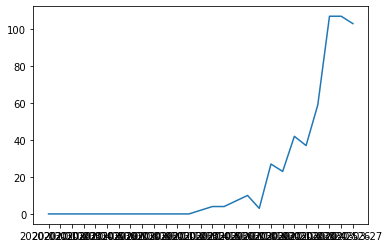

In [59]:
import matplotlib.pyplot as plt
plt.plot(covidNY.date,covidNY.new_deaths)

## Now let's go back to our initial dataframe--> covidUS



In [60]:
#reminder this is how it looks like after adding 2new columns: 

covidUS.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


let's look into how which states have recorded cases.


In [61]:
covidUS.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia'], dtype=object)

In [62]:
#we can now find the number of states that have cases: 
len(covidUS.state.unique()) 
    

54

We can now create a new dataframe in which we will look into the number of deaths in each state on March 27th. 
To do so we'd need to filter through the "date" column and only display 2020-03-27

In [63]:
#let's create a new DF with March 27th only
march27 = covidUS[covidUS['date']== '2020-03-27']

In [64]:
#let's check it out
march27.head()

,date,state,fips,cases,deaths
1335,2020-03-27,Alabama,1,639,4
1336,2020-03-27,Alaska,2,85,1
1337,2020-03-27,Arizona,4,665,15
1338,2020-03-27,Arkansas,5,386,3
1339,2020-03-27,California,6,4914,102


In [65]:
#remember the sorting command from earlier in this noteboook?
sorted27 = march27.sort_values(by='cases',  ascending=False)

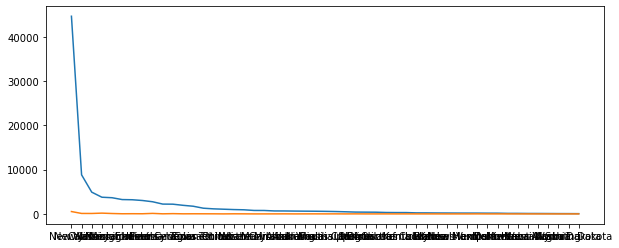

In [66]:
#let's try to plot the number of cases and number of deaths in March 27th for each state 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
cases = plt.plot(sorted27.state, sorted27.cases)
deaths = plt.plot(sorted27.state, sorted27.deaths)
plt.show()

# Task 2: 
1. What is this chart showing? Is this a good representation of the data? Why or why not? 
I think it is not. Because the difference is not very obvious.  
2. Can you think of other ways to display this infomration in a more meanigful way? 
Making different unit on cloumns and raws.  

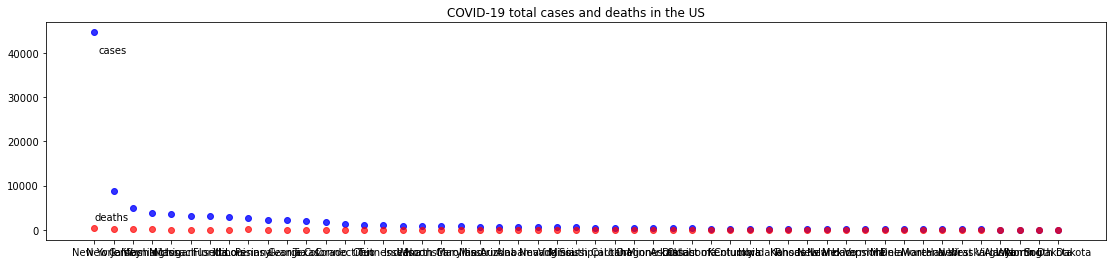

In [67]:
#to make this visualization better I will try to display the info in data points and not a continuous line.
#let's try to plot the number of cases and number of deaths in March 27th for each state 
#I will also change the chart size 
import matplotlib.pyplot as plt
plt.figure(figsize=(19,4))
#let's also change the colors of the dots so the cases are blue and the deaths are red
cases = plt.plot(sorted27.state, sorted27.cases, 'ro', c='b',alpha=0.8)
deaths = plt.plot(sorted27.state, sorted27.deaths, 'ro', alpha=0.7)

# We can add labels
plt.text(0.2,40000, 'cases')
plt.text(0.001,2200, 'deaths')

# and of course add title: 

plt.title('COVID-19 total cases and deaths in the US')
plt.show()

Alright, this is a little better! But still the states names are mostly not visible because there are too many of them! 

To highlight the gap betwen deaths and confirmed cases I will remove those states that have less than 10 cases: 


In [68]:
sorted27 = sorted27[sorted27['deaths']>20]

In [69]:
len(sorted27)

16

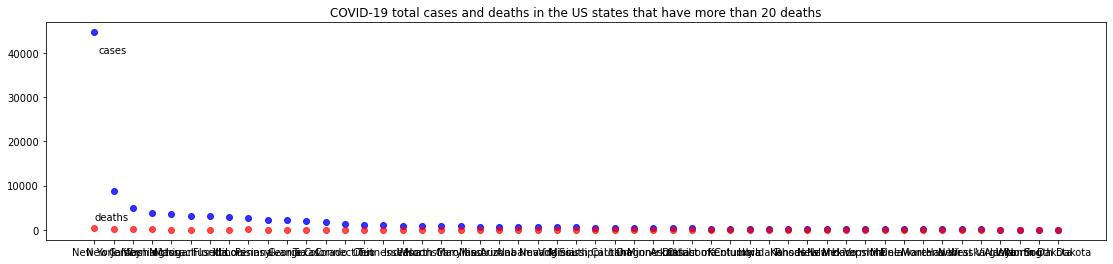

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19,4))
#let's also change the colors of the dots so the cases are blue and the deaths are red
cases = plt.plot(sorted27.state, sorted27.cases, 'ro', c='b',alpha=0.8)
deaths = plt.plot(sorted27.state, sorted27.deaths, 'ro', alpha=0.7)

# We can add labels
plt.text(0.2,40000, 'cases')
plt.text(0.001,2200, 'deaths')

# and of course add title: 

plt.title('COVID-19 total cases and deaths in the US states that have more than 20 deaths')
plt.show()

## Task 3: 
For the March 27th DataFrame: 

As of March 27th, which are the top 5 states in terms of the highest ratio of deaths/total cases? 
Where is New York State ranked?

- Hint: work on the march27 df, and create a new column that calculates this ratio. Then sort the DF by the new column. 

In [ ]:
#your code here:

In [71]:
march27 = covidUS[covidUS['date']== '2020-03-27']

In [72]:
march27.head()

,date,state,fips,cases,deaths
1335,2020-03-27,Alabama,1,639,4
1336,2020-03-27,Alaska,2,85,1
1337,2020-03-27,Arizona,4,665,15
1338,2020-03-27,Arkansas,5,386,3
1339,2020-03-27,California,6,4914,102


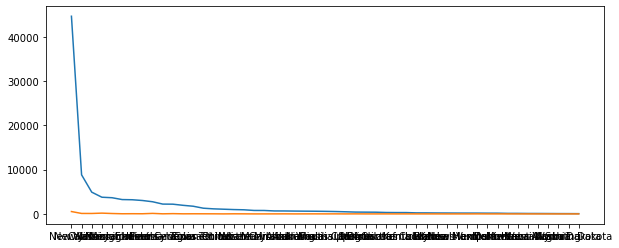

In [74]:
sorted27 = march27.sort_values(by='cases',  ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
cases = plt.plot(sorted27.state, sorted27.cases)
deaths = plt.plot(sorted27.state, sorted27.deaths)
plt.show()

## Task 4: 

- Download the US level data from the New York Times Github repo (named us.csv) https://github.com/nytimes/covid-19-data 
- Create a new column to calculate the number of new cases and new deaths per day 
- Plot the data (day on the X axis and number of deaths or cases in the Y axis) 




In [91]:
#Your code here: 

usData = pd.read_csv('us.csv')

new_deaths = []
previous_count = 0
for i in range(len(usData.deaths)):
    current_count = usData.deaths.iloc[i]
    new_deaths.append(current_count - previous_count)
    previous_count = current_count
usData['new_deaths'] = new_deaths

new_cases = []
previous_count = 0
for i in range(len(usData.cases)):
    current_count = usData.cases.iloc[i]
    new_cases.append(current_count - previous_count)
    previous_count = current_count
usData['new_cases'] = new_cases

usData.head()



,date,cases,deaths,new_deaths,new_cases
0,2020-01-21,1,0,0,1
1,2020-01-22,1,0,0,0
2,2020-01-23,1,0,0,0
3,2020-01-24,2,0,0,1
4,2020-01-25,3,0,0,1


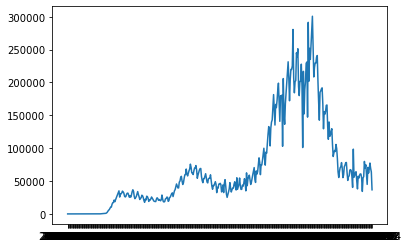

In [97]:
import matplotlib.pyplot as plt
plt.plot(usData.date,usData.new_cases)
plt.show()


## Extra credit: 
- Can you replicate Task 4 (visualizing cases and deaths on a US level) **only** using the states.csv?

In [103]:
usstates = pd.read_csv('us-states.csv')

totaldeaths = []
previous_count = 0
for i in range(len(usstates.deaths)):
    current_count = usstates.deaths.iloc[i]
    totaldeaths.append(current_count + previous_count)
    previous_count = current_count 
usstates['totaldeaths'] = totaldeaths
usstates.head()

,date,state,fips,cases,deaths,totaldeaths
0,2020-01-21,Washington,53,1,0,0
1,2020-01-22,Washington,53,1,0,0
2,2020-01-23,Washington,53,1,0,0
3,2020-01-24,Illinois,17,1,0,0
4,2020-01-24,Washington,53,1,0,0


In [ ]:
import matplotlib.pyplot as plt
plt.plot(usData.date,usData.new_cases)
plt.show()



## Submit a URL to your Github based Jupyter Notebook with the answers to these tasks.
## make sure to run the notebook and submit it with outputs 